In [1]:
import os

In [2]:
%pwd

'c:\\Users\\SUBINOY\\Documents\\Python\\ML_project\\research notebooks'

In [3]:
os.chdir("..//")
%pwd

'c:\\Users\\SUBINOY\\Documents\\Python\\ML_project'

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df= pd.read_csv("C:\\Users\\SUBINOY\\Documents\\Python\\ML_project\\artifacts\\data_ingestion\\SupplyChain.csv")
df.head()

,Transaction_Id,Type,RealDays_forShipping,ScheduledDays_forShipment,Benefit_perOrder,Sales_perCustomer,Delivery_Status,Late_DeliveryRisk,Category_Id,Category_Name,...,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Product_Status,Shipping_Date,Shipping_Mode
0,1,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,Not Available,Standard Class
1,2,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,Not Available,Standard Class
2,3,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,Not Available,Standard Class
3,4,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,Not Available,Standard Class
4,5,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,Not Available,Standard Class


In [6]:
df.shape

(361016, 49)

In [7]:
df['Customer_Name']= df['Customer_Fname'].astype(str)+" "+df['Customer_Lname'].astype(str)

In [8]:
df=df.drop(['Transaction_Id', 'Customer_Fname', 'Customer_Lname', 'Latitude', 'Longitude', 'Product_Status', 'Delivery_Status',
            'Category_Name'], axis=1)

In [9]:
for col in df.columns:
    if len(df[col].unique())==1:
        print(f'Column {col} is constant')

Column Order_Date is constant
Column Shipping_Date is constant


In [10]:
df=df.drop(['Shipping_Date', 'Order_Date'], axis=1)

## Fraud Detection

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from scipy.stats import pearsonr

In [12]:
df_fraud= df.copy()

In [13]:
df_fraud['Suspected_Fraud']= np.where(df_fraud['Order_Status']=='SUSPECTED_FRAUD', 1, 0) 

In [14]:
df_fraud.shape

(361016, 41)

In [15]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361016 entries, 0 to 361015
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Type                       361016 non-null  object 
 1   RealDays_forShipping       361016 non-null  int64  
 2   ScheduledDays_forShipment  361016 non-null  int64  
 3   Benefit_perOrder           361016 non-null  float64
 4   Sales_perCustomer          361016 non-null  float64
 5   Late_DeliveryRisk          361016 non-null  int64  
 6   Category_Id                361016 non-null  int64  
 7   Customer_City              361016 non-null  object 
 8   Customer_Country           361016 non-null  object 
 9   Customer_Id                361016 non-null  int64  
 10  Customer_Segment           361016 non-null  object 
 11  Customer_State             361016 non-null  object 
 12  Customer_Street            361016 non-null  object 
 13  Customer_Zipcode           36

In [16]:
df_fraud.isnull().sum()

Type                         0
RealDays_forShipping         0
ScheduledDays_forShipment    0
Benefit_perOrder             0
Sales_perCustomer            0
Late_DeliveryRisk            0
Category_Id                  0
Customer_City                0
Customer_Country             0
Customer_Id                  0
Customer_Segment             0
Customer_State               0
Customer_Street              0
Customer_Zipcode             0
Department_Id                0
Department_Name              0
Market                       0
Order_City                   0
Order_Country                0
Order_Customer_Id            0
Order_Id                     0
OrderItem_Cardprod_Id        0
OrderItem_Discount           0
OrderItem_DiscountRate       0
Order_Item_Id                0
OrderItem_ProductPrice       0
OrderItem_ProfitRatio        0
OrderItem_Quantity           0
Sales                        0
OrderItem_Total              0
Order_Profit_perOrder        0
Order_Region                 0
Order_St

In [17]:
df_fraud['Customer_Zipcode']= pd.to_numeric(df_fraud['Customer_Zipcode'].astype(str).str.replace(" ' ", ""), errors='coerce')

In [18]:
df_fraud.isnull().sum().sum()

np.int64(6)

In [19]:
df_fraud.dropna(axis=0, how='any', inplace=True)
df_fraud.isnull().sum().sum()

np.int64(0)

In [20]:
features= df_fraud.drop(['Suspected_Fraud', 'Order_Status'], axis=1)
target= df_fraud['Suspected_Fraud']

In [21]:
le= LabelEncoder()
def LabelEncoding(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [22]:
features=features.apply(LabelEncoding)

In [23]:
features.head(3)

,Type,RealDays_forShipping,ScheduledDays_forShipment,Benefit_perOrder,Sales_perCustomer,Late_DeliveryRisk,Category_Id,Customer_City,Customer_Country,Customer_Id,...,OrderItem_Total,Order_Profit_perOrder,Order_Region,Order_State,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,Customer_Name
0,1,3,3,18933,2568,0,47,65,1,20646,...,2568,18933,15,475,114,47,78,62,6,1876
1,3,5,3,2272,2559,1,47,65,1,19383,...,2559,2272,13,841,114,47,78,62,6,5377
2,0,4,3,2293,2555,0,47,451,0,19382,...,2555,2293,13,841,114,47,78,62,6,4428


In [24]:
features.columns

Index(['Type', 'RealDays_forShipping', 'ScheduledDays_forShipment',
       'Benefit_perOrder', 'Sales_perCustomer', 'Late_DeliveryRisk',
       'Category_Id', 'Customer_City', 'Customer_Country', 'Customer_Id',
       'Customer_Segment', 'Customer_State', 'Customer_Street',
       'Customer_Zipcode', 'Department_Id', 'Department_Name', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id', 'Order_Id',
       'OrderItem_Cardprod_Id', 'OrderItem_Discount', 'OrderItem_DiscountRate',
       'Order_Item_Id', 'OrderItem_ProductPrice', 'OrderItem_ProfitRatio',
       'OrderItem_Quantity', 'Sales', 'OrderItem_Total',
       'Order_Profit_perOrder', 'Order_Region', 'Order_State',
       'Product_Card_Id', 'Product_Category_Id', 'Product_Name',
       'Product_Price', 'Shipping_Mode', 'Customer_Name'],
      dtype='object')

In [25]:
corre= pd.DataFrame()

for i in features.columns:
    corre[i]= pearsonr(features[i], target)

corre

,Type,RealDays_forShipping,ScheduledDays_forShipment,Benefit_perOrder,Sales_perCustomer,Late_DeliveryRisk,Category_Id,Customer_City,Customer_Country,Customer_Id,...,OrderItem_Total,Order_Profit_perOrder,Order_Region,Order_State,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Shipping_Mode,Customer_Name
0,0.201938,-0.000368,-0.003387,-0.002646,-0.000819,-0.166945,-0.001049,-0.003707,0.007081,9.512614e-03,...,-0.000819,-0.002646,9.208430e-03,-0.005989,-0.000627,-0.001049,-0.000900,0.000447,-0.004805,-0.003299
1,0.000000,0.825036,0.041876,0.111871,0.622687,0.000000,0.528395,0.025928,0.000021,1.092670e-08,...,0.622687,0.111871,3.149768e-08,0.000320,0.706570,0.528395,0.588652,0.788038,0.003890,0.047428


In [26]:
corre=corre.T

In [27]:
corre.iloc[:,0].sort_values(ascending=False)

Type                         0.201938
Customer_Id                  0.009513
Order_Customer_Id            0.009513
Order_Region                 0.009208
Customer_Country             0.007081
Customer_State               0.005708
OrderItem_Discount           0.002885
Order_Item_Id                0.002582
Order_Id                     0.002492
OrderItem_DiscountRate       0.002307
Product_Price                0.000447
OrderItem_ProductPrice       0.000447
RealDays_forShipping        -0.000368
Market                      -0.000448
Sales                       -0.000474
OrderItem_Cardprod_Id       -0.000627
Product_Card_Id             -0.000627
OrderItem_Quantity          -0.000800
OrderItem_Total             -0.000819
Sales_perCustomer           -0.000819
Product_Name                -0.000900
Department_Name             -0.000915
Department_Id               -0.001029
Product_Category_Id         -0.001049
Category_Id                 -0.001049
Customer_Street             -0.001330
Order_Profit

Drop all features having negative correlation values

In [28]:
new_features= ['Type', 'Customer_Id', 'Order_Customer_Id', 'Order_Region', 'Customer_Country', 
               'Customer_State', 'OrderItem_Discount', 'Order_Item_Id', 'Order_Id', 'OrderItem_DiscountRate', 
               'Product_Price', 'OrderItem_ProductPrice']

In [29]:
# Features selection based on importance
from sklearn.feature_selection import f_classif
F_values, p_values= f_classif(features, target)

feature_imp= pd.DataFrame({
    'Feature': features.columns,
    'F_value': F_values,
    'p_values': p_values
}).sort_values(by='F_value', ascending=False)

feature_imp

,Feature,F_value,p_values
0,Type,15347.454580,0.000000e+00
5,Late_DeliveryRisk,10350.023354,0.000000e+00
9,Customer_Id,32.670507,1.092670e-08
19,Order_Customer_Id,32.670507,1.092670e-08
31,Order_Region,30.614337,3.149768e-08
8,Customer_Country,18.101707,2.094663e-05
17,Order_City,13.327696,2.615515e-04
32,Order_State,12.948589,3.202055e-04
10,Customer_Segment,12.905531,3.276561e-04
11,Customer_State,11.762622,6.043880e-04


In [30]:
#Considering features based on the importance level
final_features= features[['Type', 'Customer_Id', 'Order_Customer_Id', 'Order_Region', 'Customer_Country', 'Customer_City', 
                 'Customer_State', 'Customer_Zipcode', 'Customer_Segment', 'Order_City', 'Order_State', 'Order_Country', 
                 'ScheduledDays_forShipment', 'Late_DeliveryRisk', 'Shipping_Mode']]

In [31]:
final_data=pd.concat([final_features, target], axis=1)

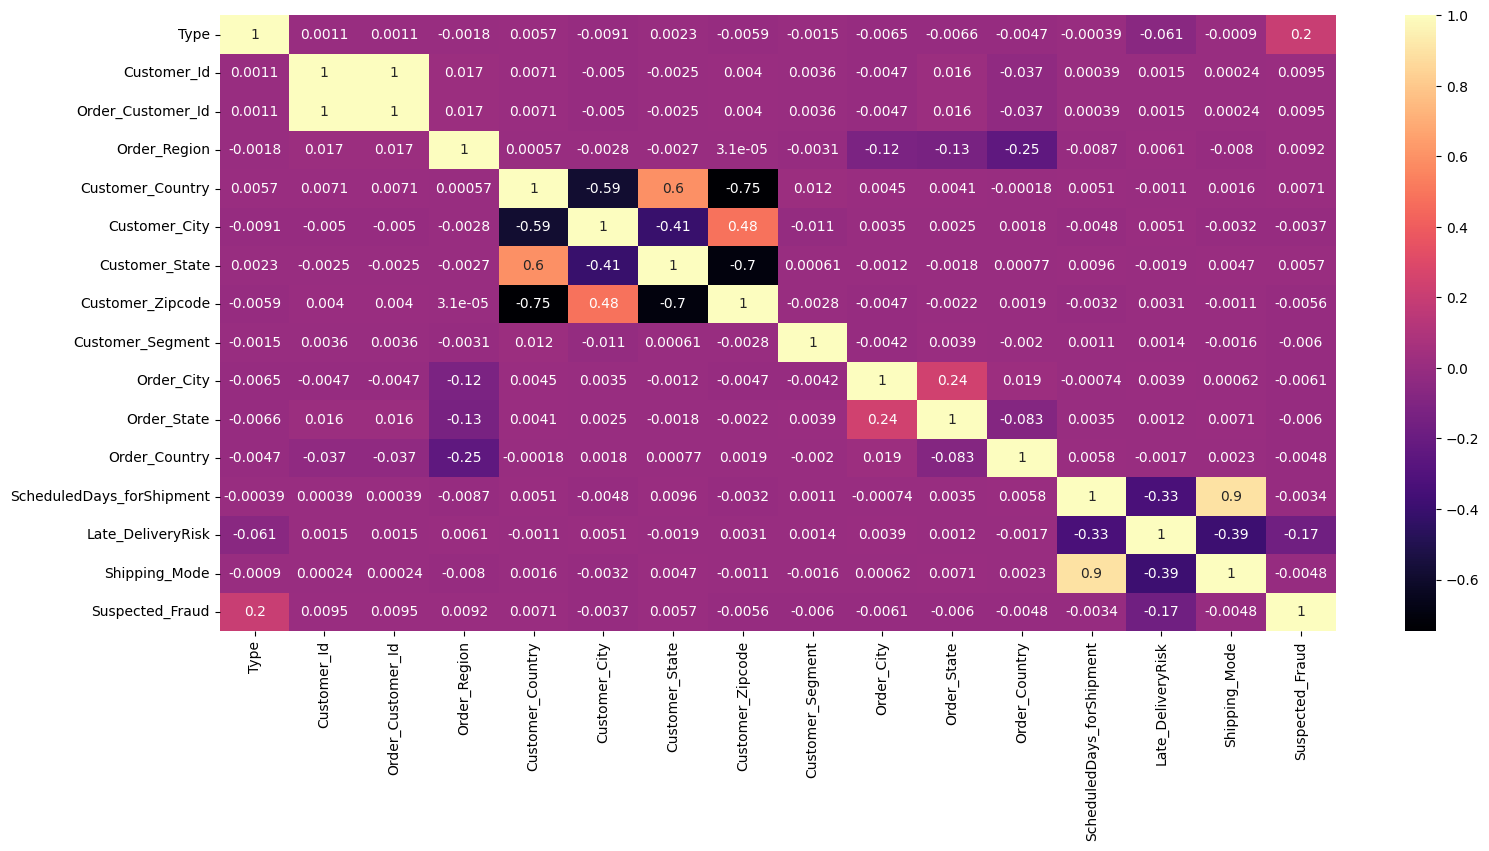

In [32]:
fig= plt.figure(figsize=(18,8))
sns.heatmap(final_data.corr(), annot=True, cmap='magma')
plt.show()

'Customer Zipcode' and 'Customer State' have strong correlation with 'Customer Country', so we omit them and keep 'Customer Country' only. Also Scheduled Days for Shipment' have strong correlation with 'Shipping Mode', hence we drop 'Scheduled Days for Shipment'. Similarly we consider only the 'Customer_Id'.

In [33]:
final_features.drop(['Order_Customer_Id', 'Customer_Zipcode', 'Customer_State', 
                     'ScheduledDays_forShipment'], axis=1, inplace=True)

In [34]:
len(final_features.columns)

11

In [35]:
final_data=pd.concat([final_features, target], axis=1)
final_data.head()

,Type,Customer_Id,Order_Region,Customer_Country,Customer_City,Customer_Segment,Order_City,Order_State,Order_Country,Late_DeliveryRisk,Shipping_Mode,Suspected_Fraud
0,1,20646,15,1,65,0,331,475,70,0,6,0
1,3,19383,13,1,65,0,391,841,69,1,6,0
2,0,19382,13,0,451,0,391,841,69,0,6,0
3,1,19381,11,0,284,2,3226,835,8,0,6,0
4,2,19380,11,1,65,1,3226,835,8,0,6,0


So the final data for fraud detection model is ready!! 